# Лабораторная работа 3
### Scikit-learn Supervised ML (Машинное обучение с учителем)
![Image of Scikit-learn](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png)

1. Прочитайте очень простое введение о машинном обучении с учителем: https://ru.wikipedia.org/wiki/Обучение_с_учителем
2. Более подробное описание есть здесь: http://www.machinelearning.ru/wiki/index.php?title=Обучение_с_учителем
3. Основные методы Supervised ML:
    * Байесовские классификаторы
    * Нейронные сети
    * Решающие деревья и леса
    * Композиции в виде взвешенных голосований, бустингов, бэггингов
    * Линейная регрессия
4. В данной работе будут рассмотрены только регрессионные модели, методы классификации Вы можете найти по ссылке внизу

Документация scikit-learn по Supervised методам: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = datasets.load_diabetes() # загрузим данные
Y, X = data['target'], data['data'].T
features = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] # признаки в датасете
data


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

## 1. Постройте графики зависимостей target (Y) от признаков (X) как единый plot с использованием команды plt.subplot

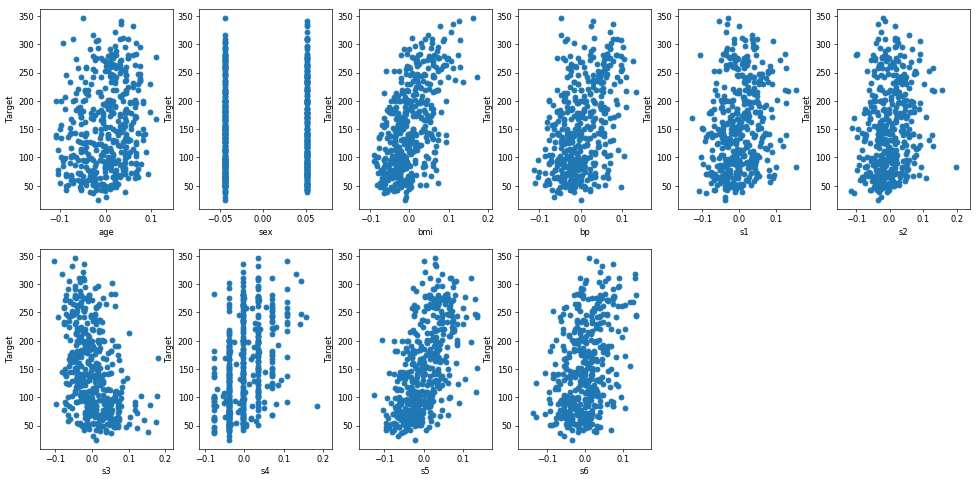

In [9]:
plt.figure(figsize=(20, 15), dpi=60) # устанавливаем размер графиков
for i in range(10):
    plt.subplot(3, 6, i+1) # выбираем нужный график из грида 3*6
    plt.scatter(X[i], Y) # рисуем график
    plt.xlabel(features[i]) # подписываем ось X
    plt.ylabel('Target')

## 2. Линейные модели

[949.43526038 152.13348416]
0.3439237602253804


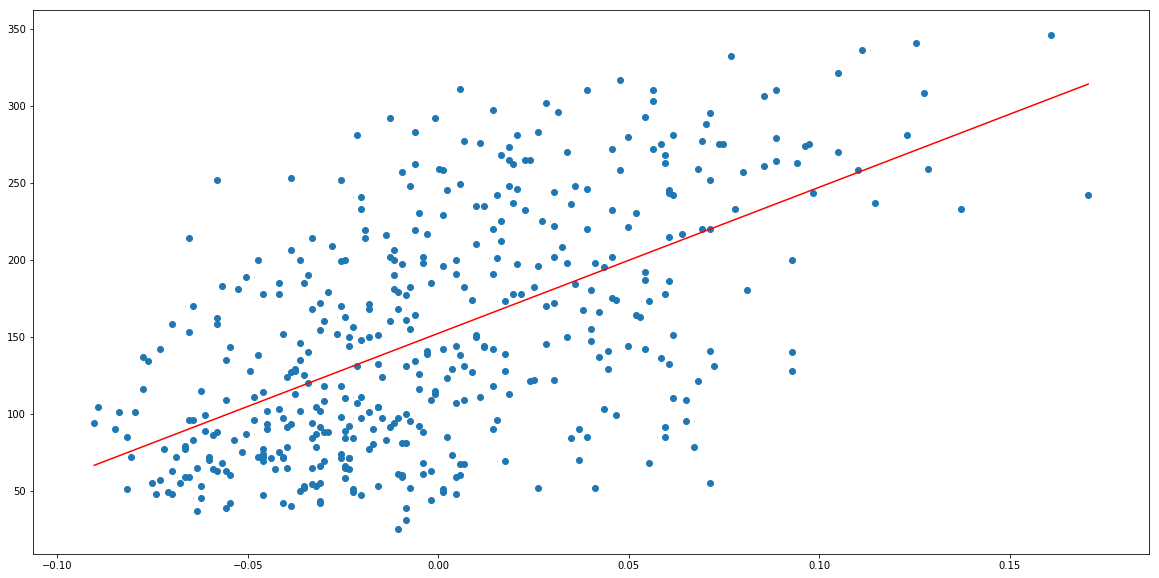

In [10]:
from sklearn import linear_model

feature = 2 # номер признака

reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit([[x, 1] for x in X[feature]], Y) # обучим регрессию k*x + b*1, метод осуществит подбор коэффциентов k и b
print(reg.coef_) # вывести коэффициенты
print(reg.score([[x, 1] for x in X[feature]], Y)) # вывести score

points = np.linspace(X[feature].min(), X[feature].max(), 100) # вы берем значения для предсказания
target = [np.sum(reg.coef_*[x, 1]) for x in points] # предсказания модели

plt.figure(figsize=(20, 10))
plt.scatter(X[feature], Y)
plt.plot(points, target, c='r')
plt.show()

## 3. Постройте полиномиальную модель 4 степени с использованием второго признака для предсказания Y. Полином выглядит так: ax^4 + bx^3 + ... + b = Y

[114576.32206995 -25895.11668061    412.54705785   1055.27334075
    151.05466919]
0.3455949866318273


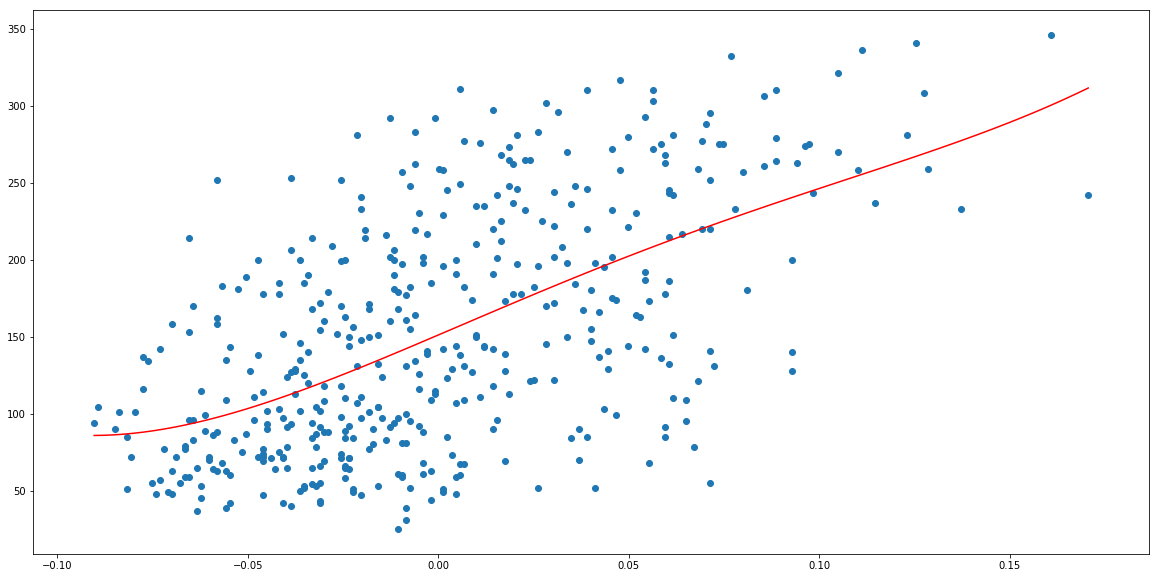

In [11]:
feature = 2

reg = linear_model.LinearRegression(fit_intercept=False)
# Ваш код
reg.fit([[x**4, x**3, x**2, x, 1] for x in X[feature]], Y)
print(reg.coef_) # вывести коэффициенты
print(reg.score([[x**4, x**3, x**2, x, 1] for x in X[feature]], Y)) # вывести score

points = np.linspace(X[feature].min(), X[feature].max(), 100) # вы берем значения для предсказания
target = [np.sum(reg.coef_*[x**4, x**3, x**2, x, 1]) for x in points] # предсказания модели

plt.figure(figsize=(20, 10))
plt.scatter(X[feature], Y)
plt.plot(points, target, c='r')
plt.show()

## 4. Постройте полиномиальную модель с использованием трех любых признаков и выведите метрику MAE (Mean Absolute Error) 

In [14]:
feats = []
for i in range(len(X[0])):
    tmp = [X[2][i], X[6][i], X[9][i]] # добавим признаки 2, 6 и 9
    feats.append(tmp)

r = linear_model.LinearRegression(fit_intercept=False)
r.fit([[x[0]**3, x[1]**2, x[2], 1] for x in feats], Y)
print('Коэффициенты: ', r.coef_) # вывести коэффициенты
print('Score: ', r.score([[x[0]**3, x[1]**2, x[2], 1] for x in feats], Y)) # вывести score

target = [np.sum(r.coef_*[x[0]**3, x[1]**2, x[2], 1]) for x in feats] # предсказания модели

# выведем MAE
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(Y, target)
print('MAE:', MAE)

Коэффициенты:  [58890.64802537 -1600.64336928   486.58560518   151.97700382]
Score:  0.2695133545133651
MAE: 54.523451037557564


## 5. SVM и tree модели. С использованием метода svm.SVR и tree.DecisionTreeRegressor постройте модели с использованием метода опорных векторов и деревьев принятия решений. Выведите среднее значение вектора Y и MAE построенных моделей. Для обучения и тестирования независимые выборки.

In [18]:
from sklearn import svm

feature = 8 # номер признака

r = svm.SVR(kernel='linear')
r.fit([[x, 1] for x in X[feature]], Y) 
print('Среднее значение веткора Y: ', np.mean(Y)) # среднее значение вектора Y

traget = [np.sum(r.predict([[x, 1] for x in X[feature]]))]

MAE = mean_absolute_error(Y, target)
print('MAE:', MAE)

Среднее значение веткора Y:  152.13348416289594
MAE: 54.523451037557564


In [19]:
from sklearn import tree

feature = 0 # номер признака

r = tree.DecisionTreeRegressor()
r.fit([[x, 1] for x in X[feature]], Y) 
print('Среднее значение веткора Y: ', np.mean(Y)) # среднее значение вектора Y

traget = [np.sum(r.predict([[x, 1] for x in X[feature]]))]

MAE = mean_absolute_error(Y, target)
print('MAE:', MAE)


Среднее значение веткора Y:  152.13348416289594
MAE: 54.523451037557564


 6. Используйте 5-fold кросс-валидацию для обучения любой понравившейся Вам модели (https://scikitlearn.org/stable/modules/cross_validation.html). Выведите метрики тестов для каждого получившегося набора (должно получится 5 независимых друг от друга метрик).

In [27]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

feat = []
for i in range(len(X[0])):
    tmp = [X[0][i],X[1][i],X[2][i],X[3][i],X[4][i], X[5][i], X[6][i],X[7][i],X[8][i],X[9][i]] 
    feat.append(tmp)
    
r = LinearRegression()
r.fit([[x[0]**3, x[1]**2, x[2], 1] for x in feat], Y)

scores = cross_val_score(r, feat, Y, cv=5)

print(scores)

print("Average 5-Fold CV Score: {}".format(np.mean(scores)))

[0.42955643 0.52259828 0.4826784  0.42650827 0.55024923]
Average 5-Fold CV Score: 0.48231812211149394


In [28]:
feature = 7 # номер признака

r = linear_model.LinearRegression(fit_intercept=False)
r.fit([[x, 1] for x in X[feature]], Y) # обучим регрессию k*x + b*1, метод осуществит подбор коэффциентов k и b

scores = cross_val_score(r, feats, Y, cv=5)

print(scores)

print("Average 5-Fold CV Score: {}".format(np.mean(scores)))

[-4.68796736 -3.55342853 -3.07757215 -4.5030288  -3.1281043 ]
Average 5-Fold CV Score: -3.7900202278020694


In [31]:
feature = 1 # номер признака

r = svm.SVR(kernel='linear')
r.fit([[x, 1] for x in X[feature]], Y) 

scores = cross_val_score(r, feats, Y, cv=5)

print(scores)

print("Average 5-Fold CV Score: {}".format(np.mean(scores)))

[-0.00149039 -0.06184001  0.00870314 -0.03402417 -0.01126642]
Average 5-Fold CV Score: -0.019983570466736444
